# Integrating the radial Schrödinger equation for a spherically symmetric potential

Student: Aceves Rodríguez, Uriel Allan

## 1)

Import the plotting library

In [1]:
using PyPlot

We define the grid

In [2]:
# Logarithmic grid
rmin = 0.09
rmax = 10
dx   = 0.005
x = Array([log(i) for i in rmin:dx:rmax])
r = Array([1/exp(x[i]) for i in 1:length(x)]);
r_exact = Array([1/exp(x[i]) for i in 1:length(x)]);

We also define the functions to plot the analytical solution

In [3]:
u_10(r::Float64) = 2*r*exp(-r)
u_20(r::Float64) = (1/sqrt(2))*r*(1-0.5*r)*exp(-r/2)
u_21(r::Float64) = (1/sqrt(24))*r^2*exp(-r/2)
u_30(r::Float64) = (2/sqrt(27))*r*(1-2*r/3 + 2*(r^2)/27)*exp(-r/3)
u_31(r::Float64) = (8/(27*sqrt(6)))*r^2*(1 - r/6)*exp(-r/3)
u_32(r::Float64) = (4/(81*sqrt(30)))*r^3*exp(-r/3)

u_10(1.0)
u_20(1.0)
u_21(1.0)
u_30(1.0) 
u_31(1.0) 
u_32(1.0); 

Finally we plot them

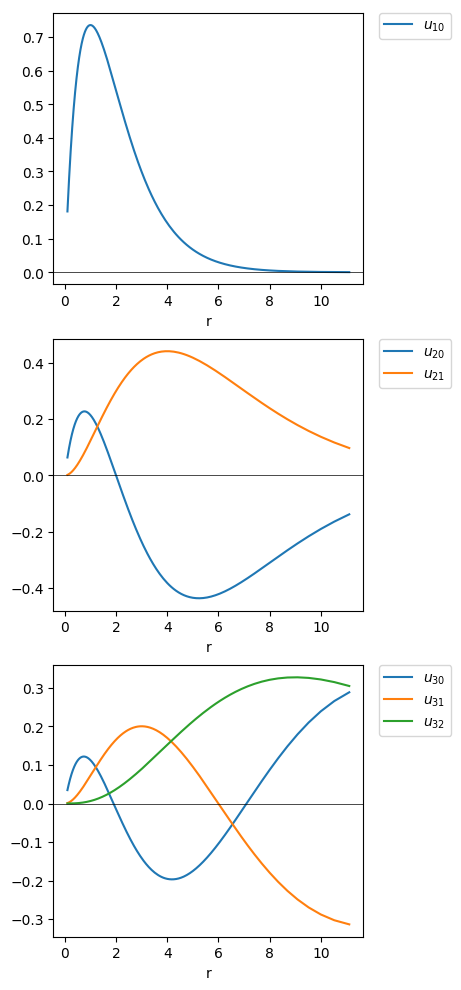

In [4]:
fig = figure("pyplot_subplot_mixed",figsize=(4,12))

subplot(311)
exact_10 = Array([u_10(i) for i in r])
plot(r,exact_10, label = L"u_{10}")

axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

subplot(312)
exact_20 = Array([u_20(i) for i in r])
plot(r,exact_20, label = L"u_{20}")

exact_21 = Array([u_21(i) for i in r])
plot(r,exact_21, label = L"u_{21}")

axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

subplot(313)
exact_30 = Array([u_30(i) for i in r])
plot(r,exact_30, label = L"u_{30}")

exact_31 = Array([u_31(i) for i in r])
plot(r,exact_31, label = L"u_{31}")

exact_32 = Array([u_32(i) for i in r])
plot(r,exact_32, label = L"u_{32}")

axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")
show()

Up to this point, no problem. We have the analytical solutions to the radial equation (except for an r factor) and they are behaving nicely

## 2)

Our next step is to define the numerov integrator, it will need 4 parameters in general

- The energy
- A potential function
- A grid
- Starting points

In [5]:
function numerov_int(E,V,grid,start)
    
    sols = zeros(grid)

    sols[1] = start[1]
    sols[2] = start[2]
    
    k2 = 2.*(E-V)

    r_sorted = sort(grid) #sometimes the grid is not sorted,
    #and we want no susprises here

    for i in 3:length(r_sorted)

        #We have to be careful when choosing this h
        h2 = (r_sorted[i-1] - r_sorted[i-2])^2
        
        #numerator and denominator of numerov method
        num = 2*(1.0 - 5*h2*k2/12)*sols[i-1]
        num -= (1-h2*k2/12)*sols[i-2]
        den = 1 + h2*k2/12

        #store solution
        sols[i] = num/den
        
    end
    
    return sols
    
end

numerov_int (generic function with 1 method)

**In julia when we run the functions for the first time they are compiled, and in future uses the compiled code is used when calling the function. That's why I run this function below**

In [6]:
vec = numerov_int(7.,0.,r,[0.01,0.02]);

## 2)

We define a function to calculate the $k^2$ that appears in the numerov method using the effective potential from the radial equation of the hydrogen atom in atomic units

In [7]:
function k2(E,V,l,r)
    
    return 2.*(E - V(r) - l*(l+1)/(2*r^2))
    
end

k2 (generic function with 1 method)

Below we define a function to use the numerov method to solve the radial equation, so we add l as a parameter to make our lives easier

In [8]:
function numerov_int(E,V,l,grid,start)
    
    sols = zeros(grid)

    sols[1] = start[1]
    sols[2] = start[2]

    r_sorted = sort(grid)

    for i in 3:length(r_sorted)

        h2 = (r_sorted[i-1] - r_sorted[i-2])^2
        
        k2_pres = k2(E,V,l,r_sorted[i-1])
        k2_minus = k2(E,V,l,r_sorted[i-2])
        k2_plus = k2(E,V,l,r_sorted[i])

        num = 2*(1.0 - 5*h2*k2_pres/12)*sols[i-1]
        num -= (1-h2*k2_minus/12)*sols[i-2]
        den = 1 + h2*k2_plus/12

        sols[i] = num/den
        
    end
    
    return sols
    
end

numerov_int (generic function with 2 methods)

## 3)

Now our time has come

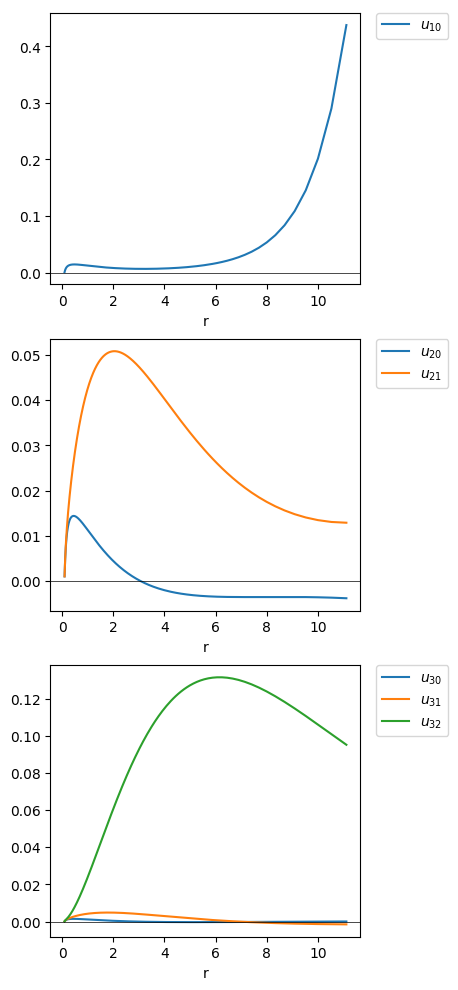

In [9]:
a(x) = -1/x #potential 1/r
domain = sort(r) #sorting to avoid surprises

#The energy is -0.5/n^2

fig = figure("pyplot_subplot_mixed",figsize=(4,12))

subplot(311)
#numerov_int(E,V(r),l,grid,starting_points)
num_u_10 = numerov_int(-.5,a,0.,r,[0.001,0.00101])
plot(domain,num_u_10, label = L"u_{10}")

axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

subplot(312)
#numerov_int(E,V(r),l,grid,starting_points)
#E = -0.5/4
num_u_20 = numerov_int(-.5/4,a,0.,r,[0.001,0.00101])
num_u_21 = numerov_int(-.5/4,a,1.,r,[0.001,0.00101])
plot(domain,num_u_20, label = L"u_{20}")
plot(domain,num_u_21, label = L"u_{21}")


axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

subplot(313)
#numerov_int(E,V(r),l,grid,starting_points)
#E = -0.5/9
num_u_30 = numerov_int(-.5/9,a,0.,r,[0.0001,0.000101])
num_u_31 = numerov_int(-.5/9,a,1.,r,[0.0001,0.000101])
num_u_32 = numerov_int(-.5/9,a,2.,r,[0.0001,0.000101])

plot(domain,num_u_30, label = L"u_{30}")
plot(domain,num_u_31, label = L"u_{31}")
plot(domain,num_u_32, label = L"u_{32}")


axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

show()

We obviously have a normalization problem here. We need to renormalize the functions but first we need to define a function to do that, we will use Riemann sums, with the average value of the function on the interval as the height of the rectangle

In [10]:
function riemann_normalize(c,domain)
    sum = 0
    
    #calculating the area
    for i in 2:length(c)
        sum += abs(c[i]+c[i-1])*(domain[i]-domain[i-1])/2
    end
    
    #Reescaling
    for i in 1:length(c)
        c[i] = c[i]/sum
    end
    
    return c
    
end

riemann_normalize (generic function with 1 method)

Now we can renormalize the functions and see what is going on

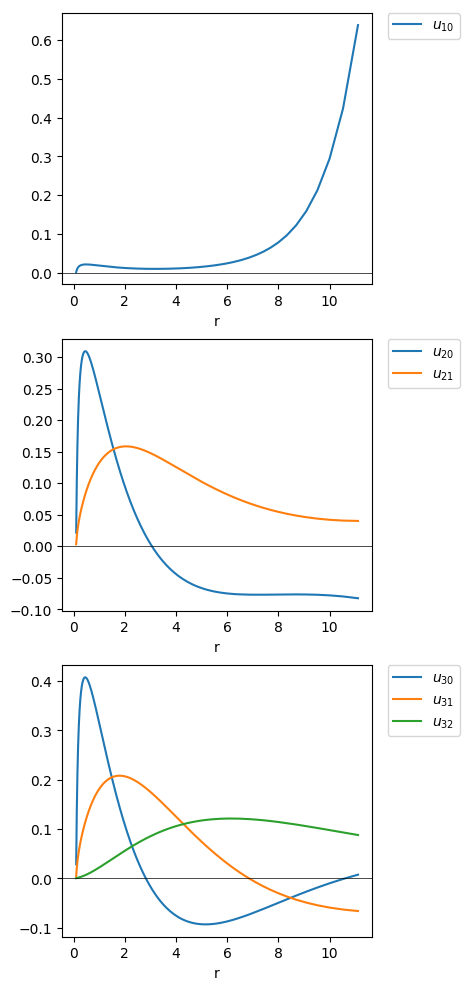

In [11]:
domain = sort(r)

fig = figure("pyplot_subplot_mixed",figsize=(4,12))

subplot(311)
num_u_10 = riemann_normalize(num_u_10,domain)
plot(domain,num_u_10, label = L"u_{10}")

axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

subplot(312)
num_u_20 = riemann_normalize(num_u_20,domain)
num_u_21 = riemann_normalize(num_u_21,domain)
plot(domain,num_u_20, label = L"u_{20}")
plot(domain,num_u_21, label = L"u_{21}")


axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

subplot(313)

num_u_30 = riemann_normalize(num_u_30,domain)
num_u_31 = riemann_normalize(num_u_31,domain)
num_u_32 = riemann_normalize(num_u_32,domain)

plot(domain,num_u_30, label = L"u_{30}")
plot(domain,num_u_31, label = L"u_{31}")
plot(domain,num_u_32, label = L"u_{32}")


axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

show()

Everything seems to be working fine, so we look at the sky after hours trying to fin the bug and let a tear scape before continuing

Now we need to compare with the analytical results

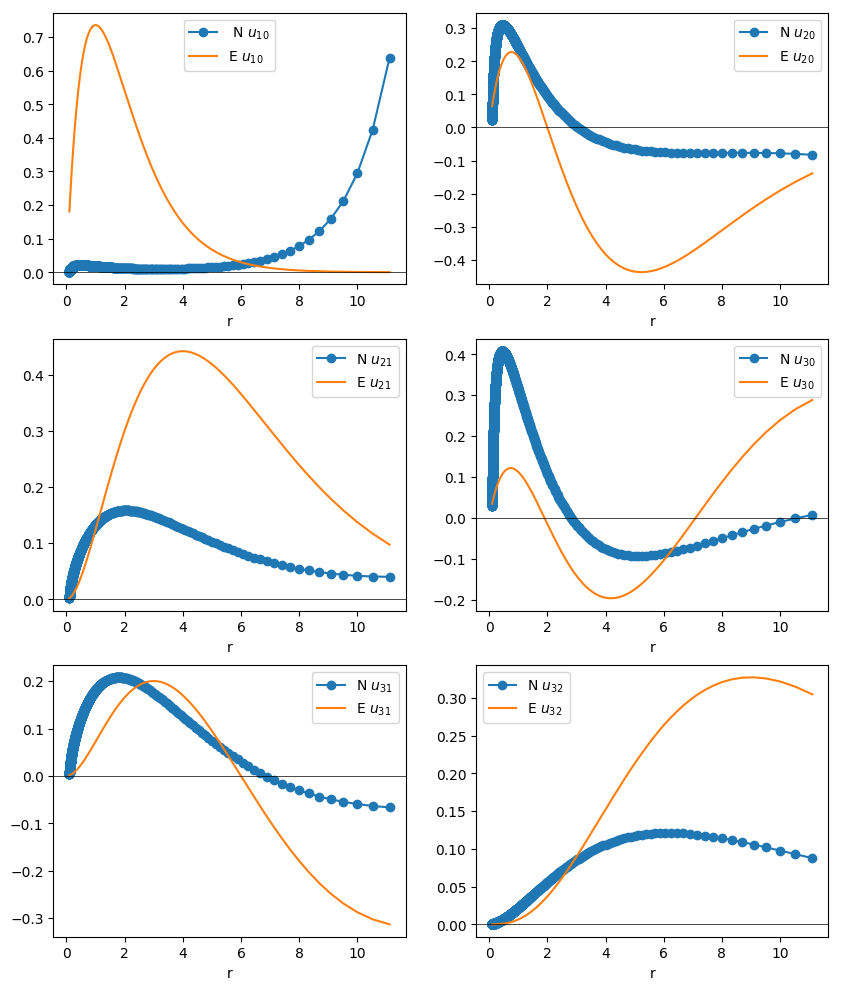

In [12]:
domain = sort(r)

fig = figure("pyplot_subplot_mixed",figsize=(10,12))

subplot(321)
plot(domain,num_u_10, label = L" N $u_{10}$", "-o")
plot(r,exact_10, label = L"E $u_{10}$")
axhline(linewidth=0.5, color="k")
legend(loc="best")
xlabel("r")

subplot(322)
plot(domain,num_u_20, label = L"N $u_{20}$", "-o")
plot(r,exact_20, label = L"E $u_{20}$")
axhline(linewidth=0.5, color="k")
legend(loc="best")
xlabel("r")

subplot(323)
plot(domain,num_u_21, label = L"N $u_{21}$", "-o")
plot(r,exact_21, label = L"E $u_{21}$")
axhline(linewidth=0.5, color="k")
legend(loc="best")
xlabel("r")

subplot(324)
plot(domain,num_u_30, label = L"N $u_{30}$", "-o")
plot(r,exact_30, label = L"E $u_{30}$")
axhline(linewidth=0.5, color="k")
legend(loc="best")
xlabel("r")

subplot(325)
plot(domain,num_u_31, label = L"N $u_{31}$", "-o")
plot(r,exact_31, label = L"E $u_{31}$")
axhline(linewidth=0.5, color="k")
legend(loc="best")
xlabel("r")

subplot(326)
plot(domain,num_u_32, label = L"N $u_{32}$", "-o")
plot(r,exact_32, label = L"E $u_{32}$")
axhline(linewidth=0.5, color="k")
legend(loc="best")
#PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

show()

**What is a good starting point $r_min$ for the integration and how do you initialize the first two
points?**

A good starting point for this program is 0.09, as we can see we can recover almost all the zeros of the radial functions. I initialize both points really close to 0, one is $u_1 = 0.0001$, and the other $u_2 = 0.000101$

**How far should you integrate?**

Far enough so you can get all the nodes. You can do this by brute force changing the mesh parameters.

**What happens when you integrate too far? Why** 

The solution blows. Actually we can begin to see this in the numerical solution of $u_{10}$. I suppose it blows for the same reason it blows in the square well, a instability in the numerov method leading to exponential grow.

**How do accuracy and stability of the Numerov integration depend on the density of the mesh points?**

It actually moves the plots a little bit if we change the density, for example, in the following cell we are going to change the density to make it 8 times smaller, and we will notice all plots will widen a bit, specially in the plot $u_{30}$ we lose 1 of the nodes. Also in the plot of $u_{10}$ we will notice that the explosion is not as big as before.

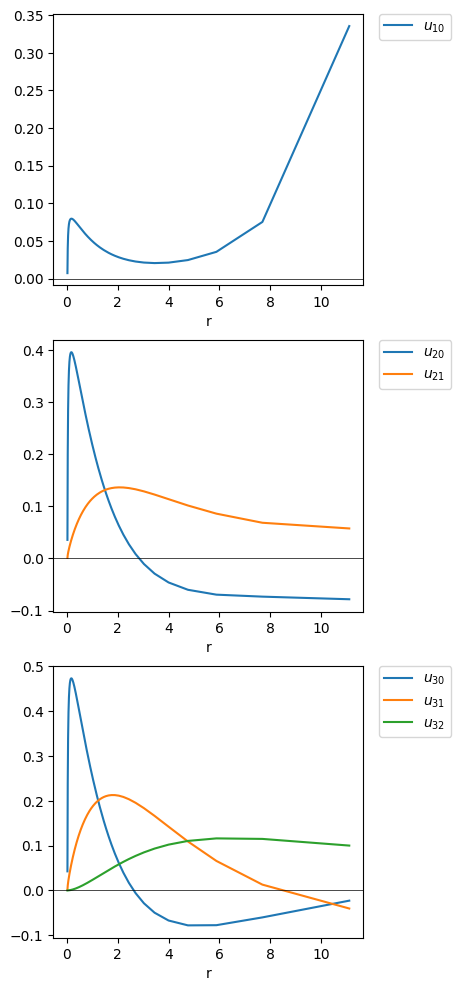

In [13]:
# Logarithmic grid
rmin = 0.09
rmax = 50
dx   = 0.04
x = Array([log(i) for i in rmin:dx:rmax])
r = Array([1/exp(x[i]) for i in 1:length(x)]);
#=
exact_10 = Array([u_10(i) for i in r])
exact_20 = Array([u_20(i) for i in r])
exact_21 = Array([u_21(i) for i in r])
exact_30 = Array([u_30(i) for i in r])
exact_31 = Array([u_31(i) for i in r])
exact_32 = Array([u_32(i) for i in r])


a(x) = -1/x=#
domain = sort(r)

fig = figure("pyplot_subplot_mixed",figsize=(4,12))

subplot(311)
num_u_10 = numerov_int(-.5,a,0.,r,[0.001,0.00101])
num_u_10 = riemann_normalize(num_u_10,domain)
plot(domain,num_u_10, label = L"u_{10}")

axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

subplot(312)
num_u_20 = numerov_int(-.5/4,a,0.,r,[0.001,0.00101])
num_u_21 = numerov_int(-.5/4,a,1.,r,[0.001,0.00101])
num_u_20 = riemann_normalize(num_u_20,domain)
num_u_21 = riemann_normalize(num_u_21,domain)
plot(domain,num_u_20, label = L"u_{20}")
plot(domain,num_u_21, label = L"u_{21}")


axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

subplot(313)

num_u_30 = numerov_int(-.5/9,a,0.,r,[0.0001,0.000101])
num_u_31 = numerov_int(-.5/9,a,1.,r,[0.0001,0.000101])
num_u_32 = numerov_int(-.5/9,a,2.,r,[0.0001,0.000101])
num_u_30 = riemann_normalize(num_u_30,domain)
num_u_31 = riemann_normalize(num_u_31,domain)
num_u_32 = riemann_normalize(num_u_32,domain)
plot(domain,num_u_30, label = L"u_{30}")
plot(domain,num_u_31, label = L"u_{31}")
plot(domain,num_u_32, label = L"u_{32}")


axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

show()

## 4) 

We are now ready to die again, but now in reverse order. The integrator will be basically the same but reverting the order of the mesh, and modifying a litte bit the indexes 

In [14]:
function numerov_int_back(E,V,l,grid,start)
    
    sols = zeros(grid)

    sols[1] = start[1]
    sols[2] = start[2]

    #same idea, but now sorting in reverse order
    r_sorted = sort(grid, rev=true)

    for i in 3:length(r_sorted)

        h2 = (r_sorted[i-1] - r_sorted[i-2])^2
        
        k2_pres = k2(E,V,l,r_sorted[i-1])
        k2_minus = k2(E,V,l,r_sorted[i-2])
        k2_plus = k2(E,V,l,r_sorted[i])

        num = 2*(1.0 - 5*h2*k2_pres/12)*sols[i-1]
        num -= (1-h2*k2_minus/12)*sols[i-2]
        den = 1 + h2*k2_plus/12

        sols[i] = num/den
        
    end
    
    return sols
    
end

numerov_int_back (generic function with 1 method)

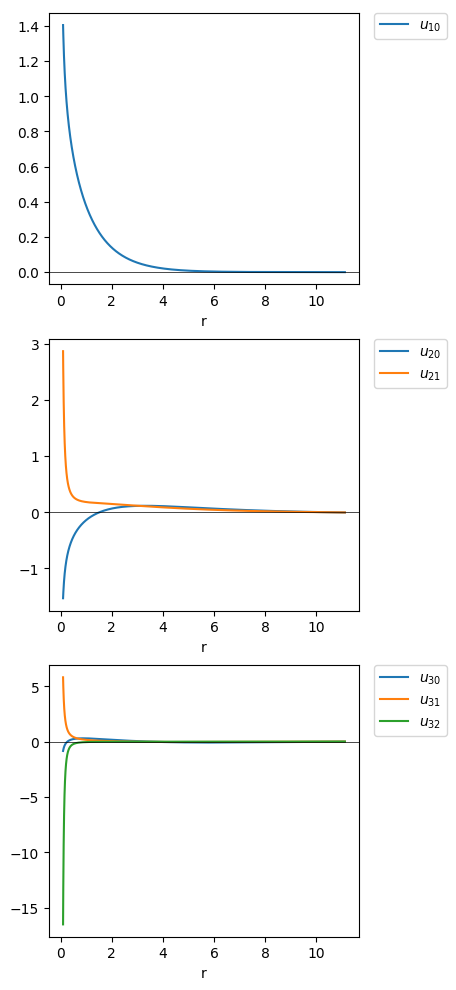

In [15]:
# Logarithmic grid
rmin = 0.09
rmax = 10
dx   = 0.0005
x = Array([log(i) for i in rmin:dx:rmax])
r = Array([1/exp(x[i]) for i in 1:length(x)]);
#=
exact_10 = Array([u_10(i) for i in r])
exact_20 = Array([u_20(i) for i in r])
exact_21 = Array([u_21(i) for i in r])
exact_30 = Array([u_30(i) for i in r])
exact_31 = Array([u_31(i) for i in r])
exact_32 = Array([u_32(i) for i in r])


a(x) = -1/x=#
domain = sort(r,rev=true)

fig = figure("pyplot_subplot_mixed",figsize=(4,12))

subplot(311)
num_u_10 = numerov_int_back(-.5,a,0.,r,[0.1,0.09])
num_u_10 = riemann_normalize(num_u_10,domain)
plot(domain,num_u_10, label = L"u_{10}")

axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

subplot(312)
num_u_20 = numerov_int_back(-.5/4,a,0.,r,[0.00011,0.0001])
num_u_21 = numerov_int_back(-.5/4,a,1.,r,[0.00011,0.0001])
num_u_20 = riemann_normalize(num_u_20,domain)
num_u_21 = riemann_normalize(num_u_21,domain)
plot(domain,num_u_20, label = L"u_{20}")
plot(domain,num_u_21, label = L"u_{21}")


axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

subplot(313)

num_u_30 = numerov_int_back(-.5/9,a,0.,r,[0.0001,0.00011])
num_u_31 = numerov_int_back(-.5/9,a,1.,r,[0.0001,0.00011])
num_u_32 = numerov_int_back(-.5/9,a,2.,r,[0.0001,0.00011])
num_u_30 = riemann_normalize(num_u_30,domain)
num_u_31 = riemann_normalize(num_u_31,domain)
num_u_32 = riemann_normalize(num_u_32,domain)
plot(domain,num_u_30, label = L"u_{30}")
plot(domain,num_u_31, label = L"u_{31}")
plot(domain,num_u_32, label = L"u_{32}")


axhline(linewidth=0.5, color="k")
PyPlot.plt[:legend](bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plot!(leg=false)
xlabel("r")

show()

Here the results are terrible, and we have to actually play a lot with the mesh to be able to see "nice" results.

**:'(**

**What is a good starting point $r_min$ for the integration and how do you initialize the first two
points? **

Here a good starting point is $r = 11.111111111111109$

**How far should you integrate? What happens when you integrate too far? Why? **

Well, I would say that integrating more than half the interval in r would not help so much, because it clearly blows easily

**How do accuracy and stability of the Numerov integration depend on the density of the mesh points?**
It depends a lot, we lose important features when the density is too low. I actually thought I had a bug until a realized what was going on. As a disclaimer I must say I'm not 100% sure I don't have a bug


It it's nonsense trying to compare with the analytical solution, because cleary they are not going to match. Instead we need to think of a way to join succesfully the integrations onwards and backwards.

## 5)

Now, to find the first energy easily we can take $l = 0$ and start printing the values of the Energy and the difference of the logaritmic derivatives. The classical turning point on this case is easy to compute

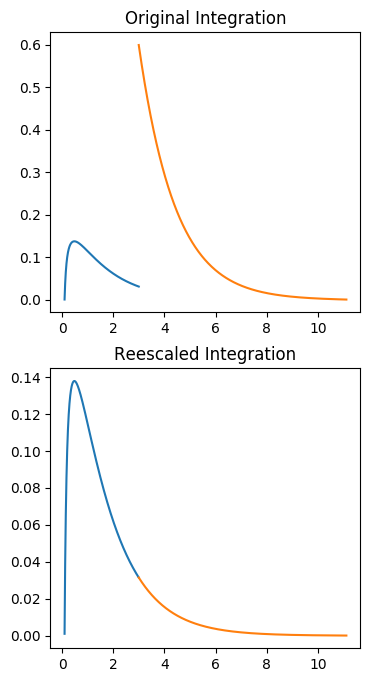

E = -0.33386136899999996, and the difference of the logaritmic derivatives 9.98024632454797e-5
I converged, you can stop crying now


In [27]:
# Mesh
rmin = 0.09
rmax = 10
dx   = 0.0005
x = Array([log(i) for i in rmin:dx:rmax])
r = Array([1/exp(x[i]) for i in 1:length(x)]);


domain = sort(r)
rev_domain = sort(r,rev=true)

#parameters 
i=0
aux1 = 0
aux2 = 0
k = 0
E = -0.33386137 #I fine tuned this a lot of time
flag = true

#k<100 helps to avoid infinite loops
while(flag && k <100)
    
    k += 1
    
    E += .000000001
    #classical turning point
    turn = abs((1/(E)))     
    
    #spot which index in the grid 
    #corresponds to the turning point
    i=1
    while(domain[i] < turn)
        i += 1
    end
    
    #solution integrated forward until turning point
    aux1 = numerov_int(E,a,0.,domain[1:i],[0.001,0.00101])
    #solution integrated backward until turning point
    aux2 = numerov_int_back(E,a,0.,domain[i:end],[0.0009,0.001])
    #reverse the order
    aux2 = aux2[end:-1:1]

    #Logaritmic derivatives
    log_der_left = aux1[end]/((aux1[end]- aux1[end-1])/(domain[i]-domain[i-1]))
    log_der_right = aux2[1]/((aux2[2]- aux2[1])/(domain[i+2]-domain[i+1]))
      
    #this print is for tuning so I can see when it goes near
    #zero and in which direction decreases or increases
    println("E = ", E, ", and the difference of the logaritmic derivatives ", abs(log_der_left-log_der_right))
    
    #When the solution converges I break the cycle
    #and plot the results.
    
    if(abs(log_der_left-log_der_right) < 0.0001)
        println("I converged, you can stop crying now")
        flag = false
        
        fig = figure("pyplot_subplot_mixed",figsize=(4,8))

        subplot(211)
        plot(domain[1:i],aux1)
        plot(domain[i:end],aux2)
        title("Original Integration")

        reescale = aux1[end]/aux2[1]
        aux2 = reescale.*aux2

        subplot(212)
        plot(domain[1:i],aux1)
        plot(domain[i:end],aux2)
        title("Reescaled Integration")

        show()
    end
    
end

There is no energy bigger (in absolute value), so this one must be the energy of the ground state **E = -0.33386136899999996**

We can try and compare with the analytical solution

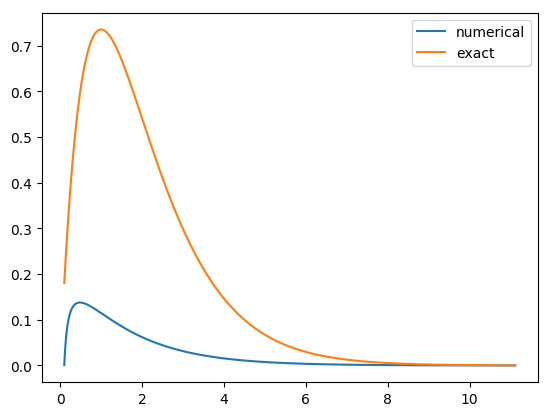

In [28]:
aux3 = vcat(aux1[1:end-1],aux2);
joined_10 = riemann_normalize(aux3,domain)

Maybe if we renormalize?

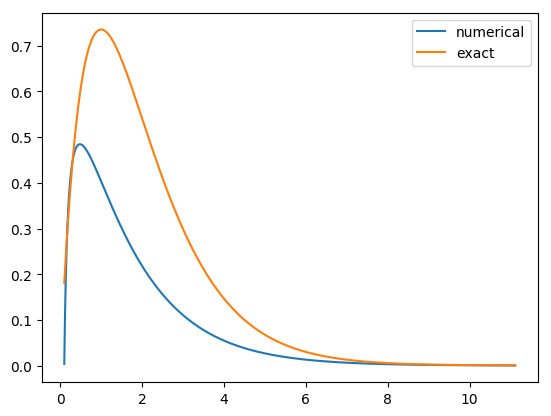

In [29]:
plot(domain,aux3,label="numerical")
plot(r_exact,exact_10,label="exact")
legend(loc="best")
show()

At this point the difference is due to mesh parameters, as before. There's two options, either we have a bug, or the solution is shifted because of the mesh.

## 6)

Here I was able to find two more eigenenergies, the problem is, the mesh is not enough to spot how many node do they have. One energy is **E = -0.1135989** and the other **E = -0.019996612000000014** but the ratio of the ground energy state we found with the second one is $\approx 16$ (16.695896734906878 actually) So this must be a state with n = 4, and we forced l to be 2. So E = -0.019996612000000014 must correspond to $u_{42}$. The other one makes no sense, the ratio to the ground state energy is $2.9389489598930973$

E = -0.11359990000000003, and the difference of the logaritmic derivatives 0.00383384708348089
E = -0.11359980000000003, and the difference of the logaritmic derivatives 0.003442525545128916
E = -0.11359970000000003, and the difference of the logaritmic derivatives 0.00305122806348912
E = -0.11359960000000002, and the difference of the logaritmic derivatives 0.002659952626590467
E = -0.11359950000000002, and the difference of the logaritmic derivatives 0.002268697381564877
E = -0.11359940000000002, and the difference of the logaritmic derivatives 0.0018774652931092817


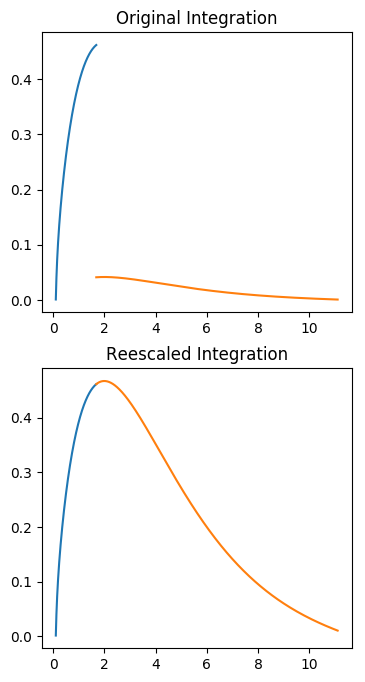

E = -0.97359930000000001, and the difference of the logaritmic derivatives 0.0014862570868761082
E = -0.11359920000000001, and the difference of the logaritmic derivatives 0.0010950696874640897
E = -0.11359910000000001, and the difference of the logaritmic derivatives 0.0007039022350614488
E = -0.113599, and the difference of the logaritmic derivatives 0.0003127613067448465
E = -0.1135989, and the difference of the logaritmic derivatives 7.836057606702695e-5
I converged, you can stop crying now


In [119]:
rmin = 0.09
rmax = 10
dx   = 0.0005
x = Array([log(i) for i in rmin:dx:rmax])
r = Array([1/exp(x[i]) for i in 1:length(x)]);


domain = sort(r)
rev_domain = sort(r,rev=true)
i=0
aux1 = 0
aux2 = 0
k = 0
E = -0.11360000000000003 #I fine tuned this a lot of time
l = 1.
flag = true
while(flag && k <100)
    
    k += 1
    
    E += 0.0000001
    turn = abs((1 -  sqrt(1-4*E*l*(l+1)))/(2*E))
    
    i=1
    while(domain[i] < turn)
        i += 1
    end
    
    if(i==1)
        i=2
    end
      
    aux1 = numerov_int(E,a,1.,domain[1:i],[0.001,0.00101])
    aux2 = numerov_int_back(E,a,1.,domain[i:end],[0.0009,0.001])
    aux2 = aux2[end:-1:1]

    log_der_left = aux1[end]/((aux1[end]- aux1[end-1])/(domain[i]-domain[i-1]))
    log_der_right = aux2[1]/((aux2[2]- aux2[1])/(domain[i+2]-domain[i+1]))
       
    println("E = ", E, ", and the difference of the logaritmic derivatives ", abs(log_der_left-log_der_right))
    
    if(abs(log_der_left-log_der_right) < 0.0001)
        println("I converged, you can stop crying now")
        flag = false
        
        fig = figure("pyplot_subplot_mixed",figsize=(4,8))

        subplot(211)
        plot(domain[1:i],aux1)
        plot(domain[i:end],aux2)
        title("Original Integration")

        reescale = aux1[end]/aux2[1]
        aux2 = reescale.*aux2

        subplot(212)
        plot(domain[1:i],aux1)
        plot(domain[i:end],aux2)
        title("Reescaled Integration")

        show()
    end
    
end

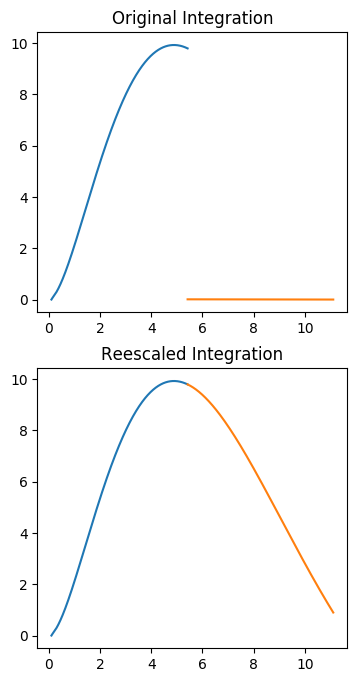

E = -0.019996611000000015, and the difference of the logaritmic derivatives 0.000100226025011807
E = -0.019996612000000014, and the difference of the logaritmic derivatives 9.613712880351954e-5
I converged, you can stop crying now


In [100]:
rmin = 0.09
rmax = 10
dx   = 0.0005
x = Array([log(i) for i in rmin:dx:rmax])
r = Array([1/exp(x[i]) for i in 1:length(x)]);


domain = sort(r)
rev_domain = sort(r,rev=true)
i=0
aux1 = 0
aux2 = 0
k = 0
E = -0.019996610000000015#I fine tuned this a lot of time
flag = true
l = 2.
while(flag && k <100)
    
    k += 1
    
    E -= 0.000000001
    turn = abs((1 -  sqrt(1-4*E*l*(l+1)))/(2*E))     
    
    i=1
    while(domain[i] < turn)
        i += 1
    end
    
    if(i==1 || i ==19822)
        i=2
    end
      
    aux1 = numerov_int(E,a,2.,domain[1:i],[0.001,0.00101])
    aux2 = numerov_int_back(E,a,2.,domain[i:end],[0.0009,0.001])
    aux2 = aux2[end:-1:1]

    log_der_left = aux1[end]/((aux1[end]- aux1[end-1])/(domain[i]-domain[i-1]))
    log_der_right = aux2[1]/((aux2[2]- aux2[1])/(domain[i+2]-domain[i+1]))
       
    println("E = ", E, ", and the difference of the logaritmic derivatives ", abs(log_der_left-log_der_right))
    
    if(abs(log_der_left-log_der_right) < 0.0001)
        println("I converged, you can stop crying now")
        flag = false
        
        fig = figure("pyplot_subplot_mixed",figsize=(4,8))

        subplot(211)
        plot(domain[1:i],aux1)
        plot(domain[i:end],aux2)
        title("Original Integration")

        reescale = aux1[end]/aux2[1]
        aux2 = reescale.*aux2

        subplot(212)
        plot(domain[1:i],aux1)
        plot(domain[i:end],aux2)
        title("Reescaled Integration")

        show()
    end
    
end